In [1]:
%%bash

#########
# This will work best in an empty folder with conda environement of python 3.12
#########

mkdir cloned_auto_tree
cd cloned_auto_tree
git clone https://github.com/sajomac/AutoTree.git
cd AutoTree

pip install -r requirements.txt

# You can now simply run: 
python src/example_main.py


Cloning into 'AutoTree'...


/home/gisam1/non_imaging_data/auto_tree/auto_tree/cloned_auto_tree/AutoTree
Defaulting to user installation because normal site-packages is not writeable
Examining Titanic Dataset: 
Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')
Mappings:
Mean Overall test F1 score: 0.82
Overall F1 score: 0.83
Figure(800x600)
Figure(640x480)
Figure(800x600)
Figure(800x600)
Figure(1000x600)
Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'species'],
      dtype='object')
(150, 5)
Mappings:
Mean Overall test F1 score: 0.95
Overall F1 score: 0.97
Figure(800x600)
Figure(640x480)
Figure(800x600)
Figure(1000x600)
Figure(1200x800)
Mappings:

Overfitting detected. Applying dimensionality reduction...
Reduction in model complexity, iteration: 0

Metrics after dimensionality reduction:
Mean test MSE: 3416.72
Mean test MAE: 47

In [34]:
############
# Or you can work with a Jupyter Notebook
############

import sys
import os
import joblib

sys.path.append(os.getcwd())
from sklearn.preprocessing import StandardScaler
from src.preprocessing import *
from src.modeling import *
from src.visualization import *



In [43]:
from sklearn.datasets import load_wine, load_breast_cancer, fetch_california_housing, load_digits, load_iris, load_diabetes

# titanic dataset
data = titanic = sns.load_dataset('titanic')
data.to_csv("data/titanic.csv")

# iris dataset
iris = load_iris()
data = pd.DataFrame(iris.data, columns=iris.feature_names)
data['species'] = iris.target
data.to_csv("data/iris.csv")

# diabetes dataset
diabetes = load_diabetes()
data = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
data['target'] = diabetes.target
data.to_csv("data/diabetes.csv")

#wine dataset
wine = load_wine()
data_wine = pd.DataFrame(wine.data, columns=wine.feature_names)
data_wine['target'] = wine.target
data_wine.to_csv("data/wine.csv", index=False)

breast_cancer = load_breast_cancer()
data_breast_cancer = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)
data_breast_cancer['target'] = breast_cancer.target
data_breast_cancer.to_csv("data/breast_cancer.csv", index=False)

# Load California Housing dataset
california_housing = fetch_california_housing()
data_california = pd.DataFrame(california_housing.data, columns=california_housing.feature_names)
data_california['target'] = california_housing.target
data_california.to_csv("data/california_housing.csv", index=False)

# Load Digits dataset
digits = load_digits()
data_digits = pd.DataFrame(digits.data)
data_digits['target'] = digits.target
data_digits.to_csv("data/digits.csv", index=False)

Examining Titanic Dataset: 
Index(['Unnamed: 0', 'survived', 'pclass', 'sex', 'age', 'sibsp', 'parch',
       'fare', 'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')
Mappings:
Mean Overall test F1 score: 0.80
Overall F1 score: 0.85


<Figure size 800x600 with 0 Axes>

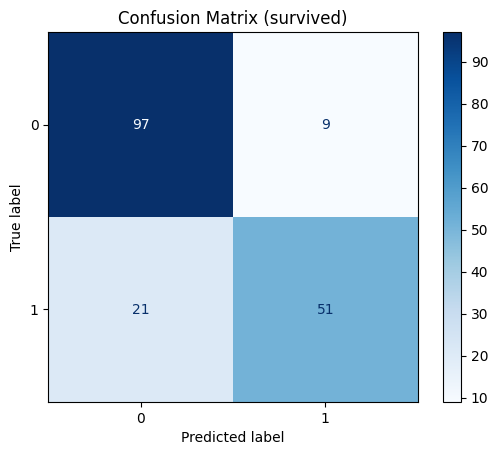

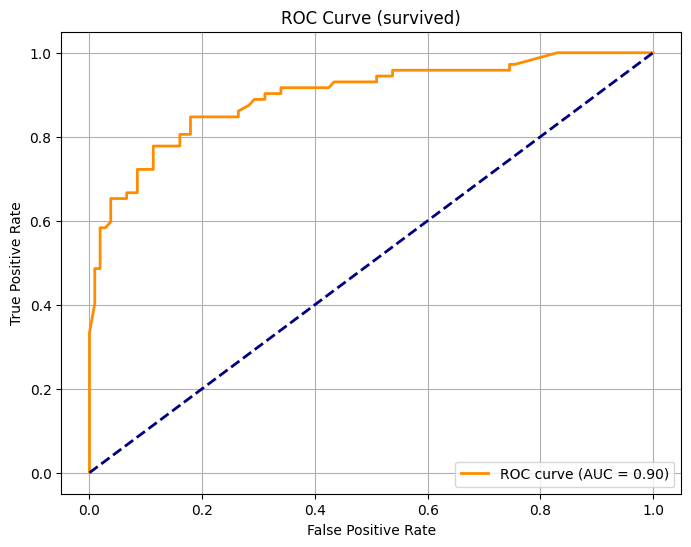

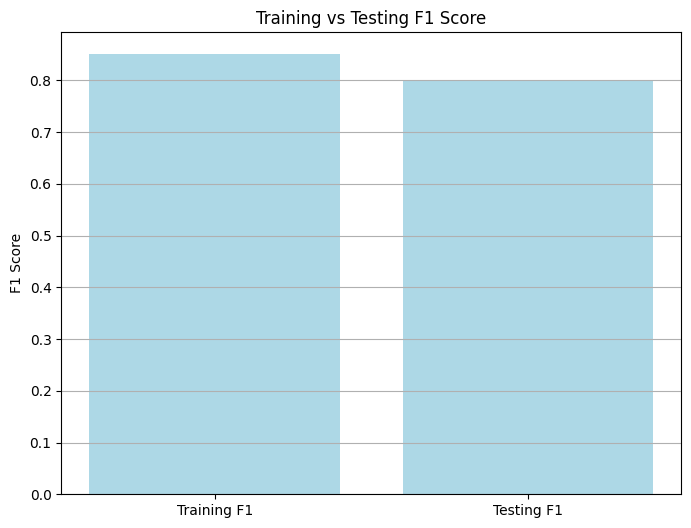

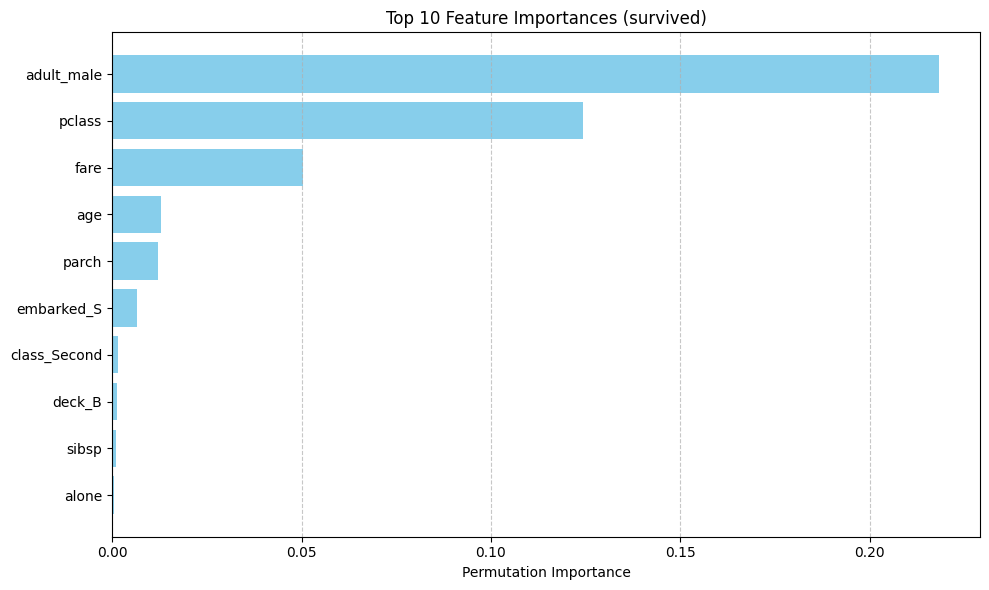

Model saved to generated_model/model_titanic_survived_categroical.joblib


In [35]:
data= pd.read_csv("data/titanic.csv")
overfit_metric, model = random_forest(
    data,
    tar="survived",
    tar_skew=False,
    pred_skew=False,
    columns_to_remove=["alive", "Unnamed: 0"],
    identify_predictors=True,
    graphs=True,
    dim_reduce=False,
    categorical = True
)

# Optionally you can save the model like so: 
model_dir = "generated_model"
os.makedirs(model_dir, exist_ok=True)

# Generate a descriptive name for the model file
model_name = "model_titanic_survived_categroical.joblib"
model_path = os.path.join(model_dir, model_name)

# Save the model
joblib.dump(model, model_path)
print(f"Model saved to {model_path}")

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'species'],
      dtype='object')
(150, 5)
Mappings:
Mean Overall test F1 score: 0.95
Overall F1 score: 0.97


<Figure size 800x600 with 0 Axes>

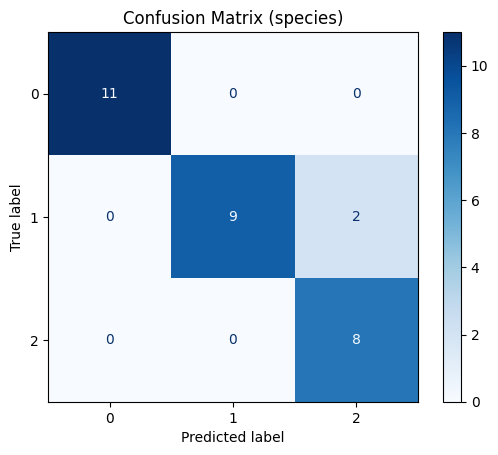

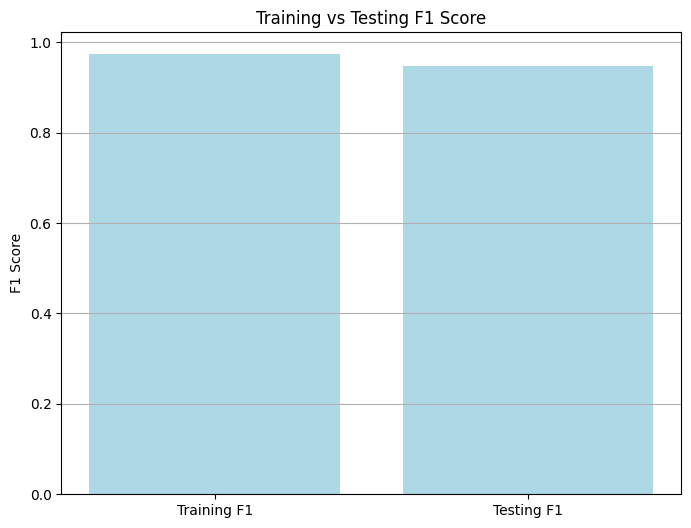

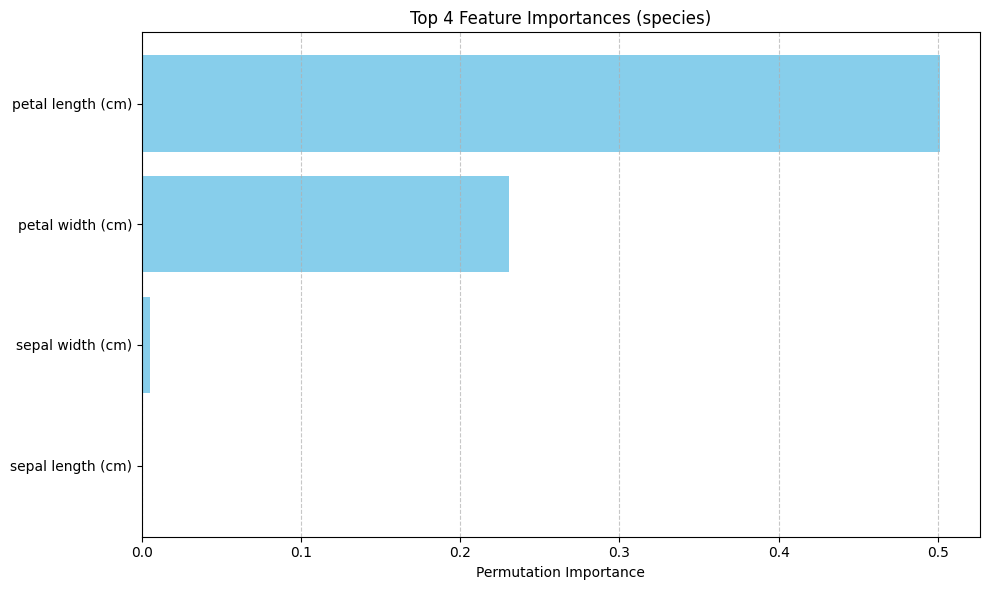

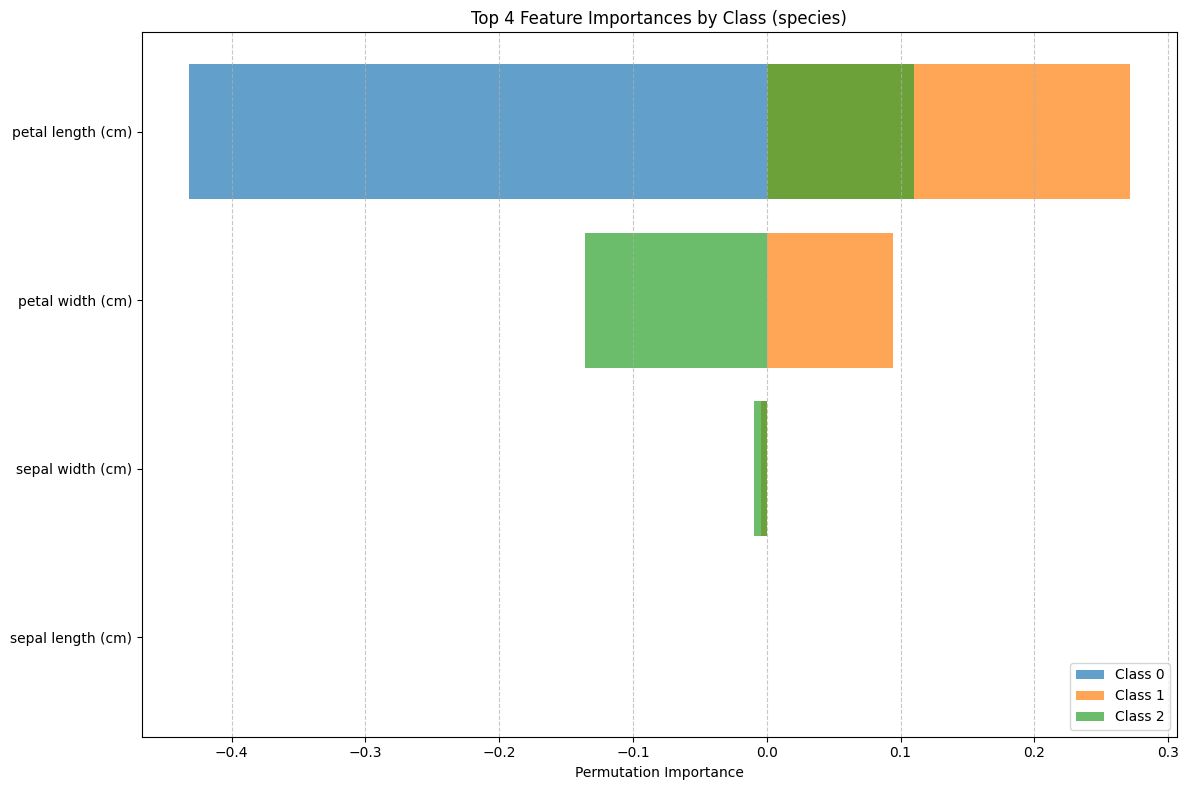

In [30]:
 
data=pd.read_csv("data/iris.csv")
overfit_metric, model = random_forest(
    data,
    tar="species", 
    tar_skew=False,
    pred_skew=False,
    columns_to_remove=["Unnamed: 0"],
    identify_predictors=True,
    graphs=True,
    dim_reduce=False,
    categorical=True
)

Mappings:

Overfitting detected. Applying dimensionality reduction...
Reduction in model complexity, iteration: 0

Metrics after dimensionality reduction:
Mean test MSE: 3211.54
Mean test MAE: 45.89
Mean test R²: 0.47
Reduction in model complexity, iteration: 1

Metrics after dimensionality reduction:
Mean test MSE: 3484.13
Mean test MAE: 48.57
Mean test R²: 0.44


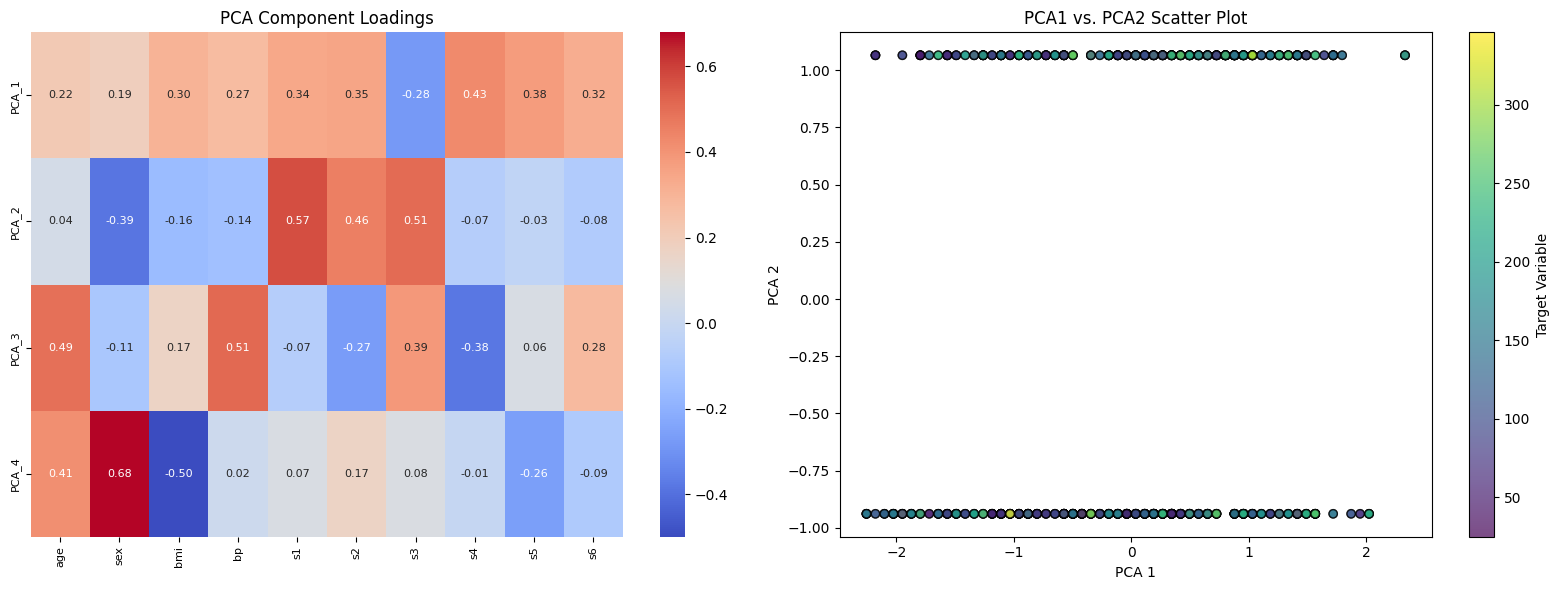

Mean Overall test MSE: 3484.13
Mean Overall test MAE: 48.57
Mean Overall test R²: 0.44
Overall MSE: 3515.74
Overall MAE: 50.23
Overall R²: 0.41

Correlation metrics on test set:
R² (Pearson squared): 0.5325
Spearman coefficient: 0.6899
P-value (Spearman): 0.0000


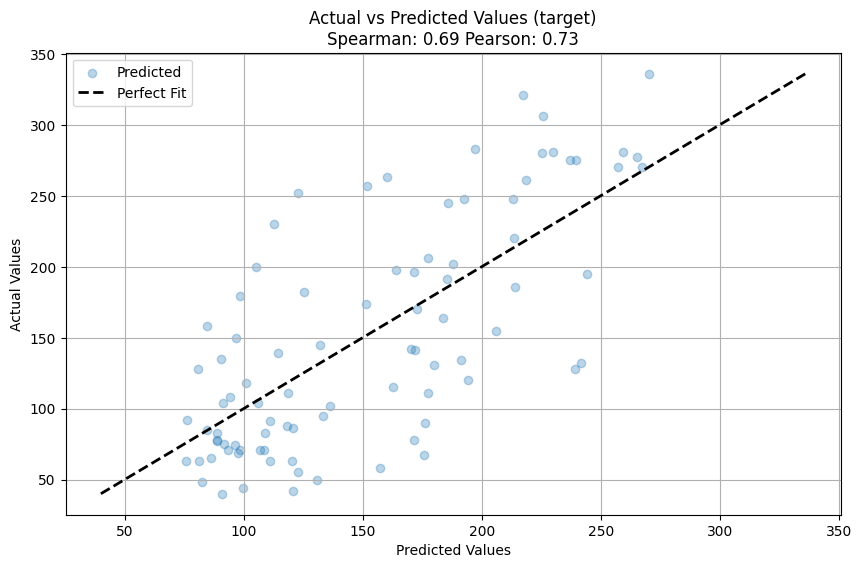

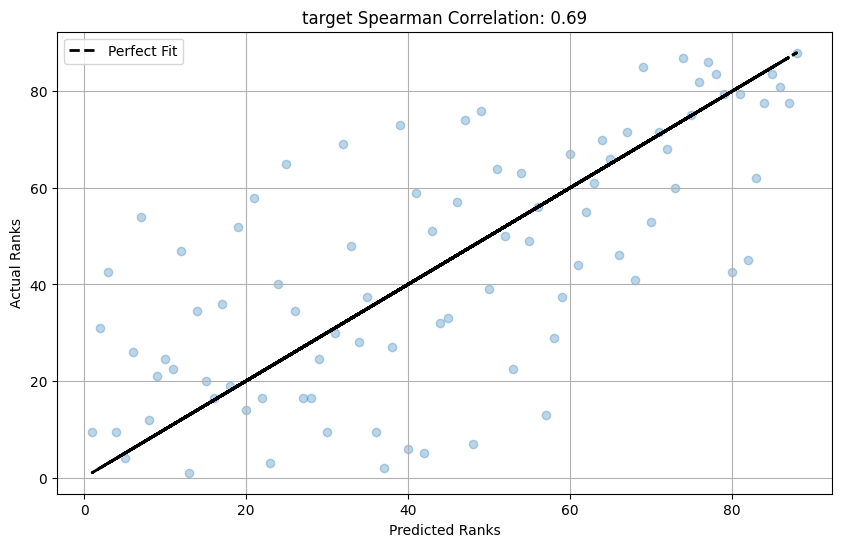

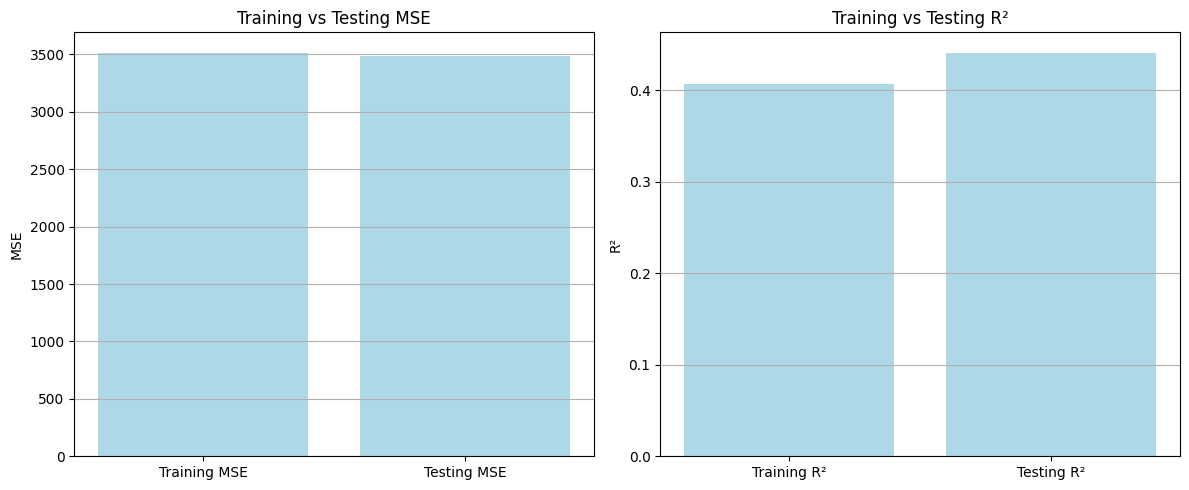

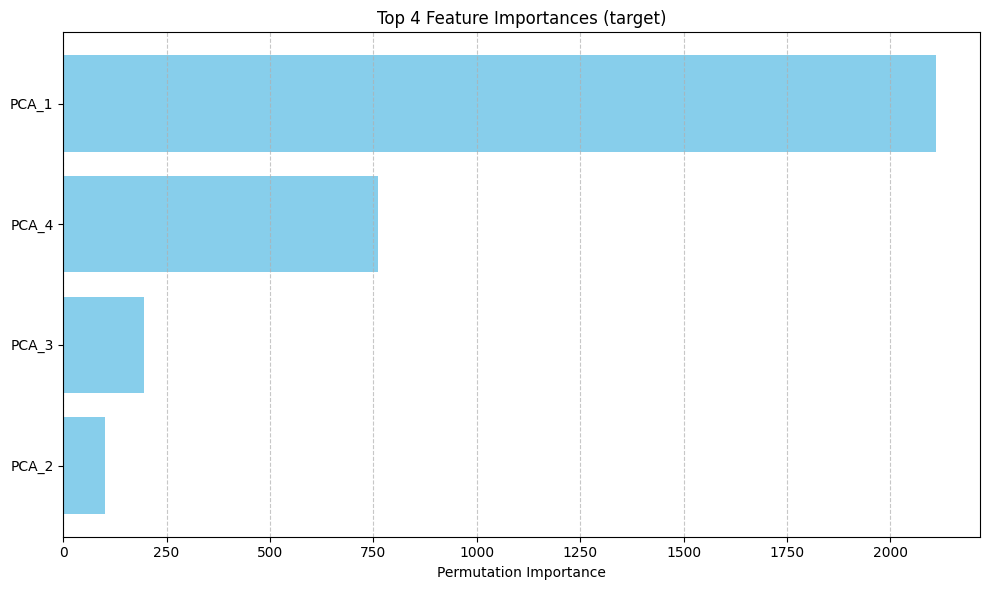

In [32]:
data = pd.read_csv("data/diabetes.csv")
overfit_metric, model = random_forest(
    data,
    tar="target",
    tar_skew=True,
    pred_skew=True,
    columns_to_remove=["Unnamed: 0"],
    identify_predictors=True,
    graphs=True,
    dim_reduce=True,
    categorical = False
)

Mappings:
Mean Overall test F1 score: 0.95
Overall F1 score: 0.97


<Figure size 800x600 with 0 Axes>

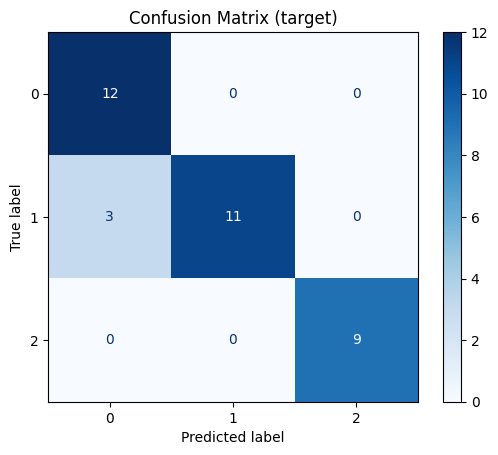

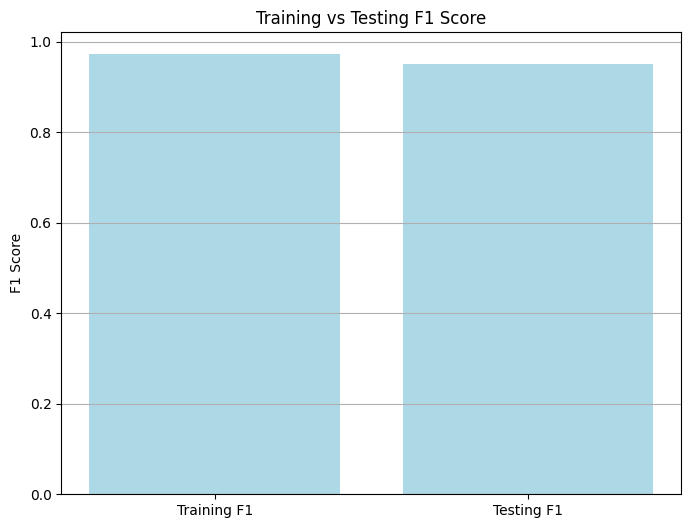

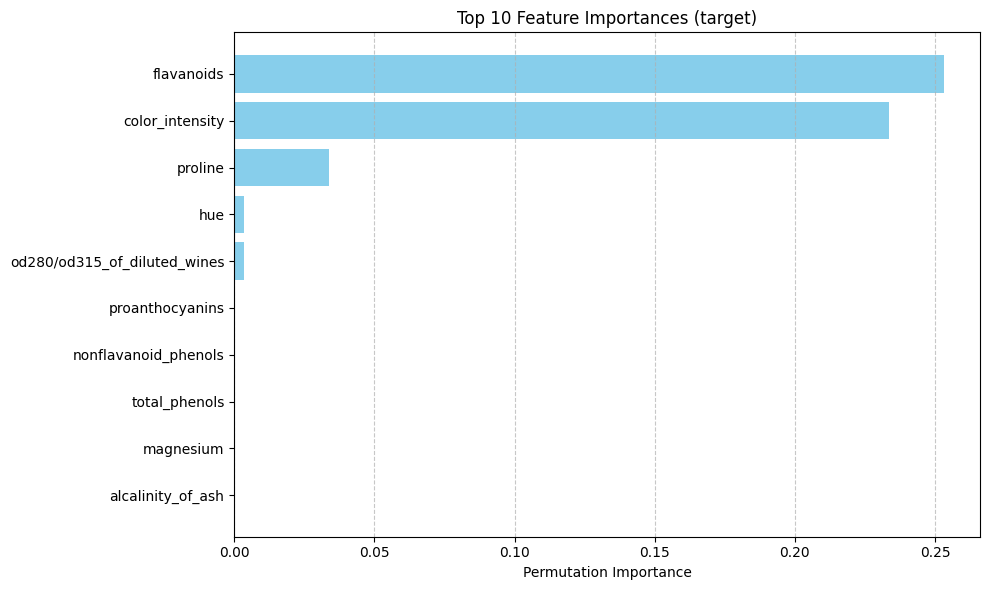

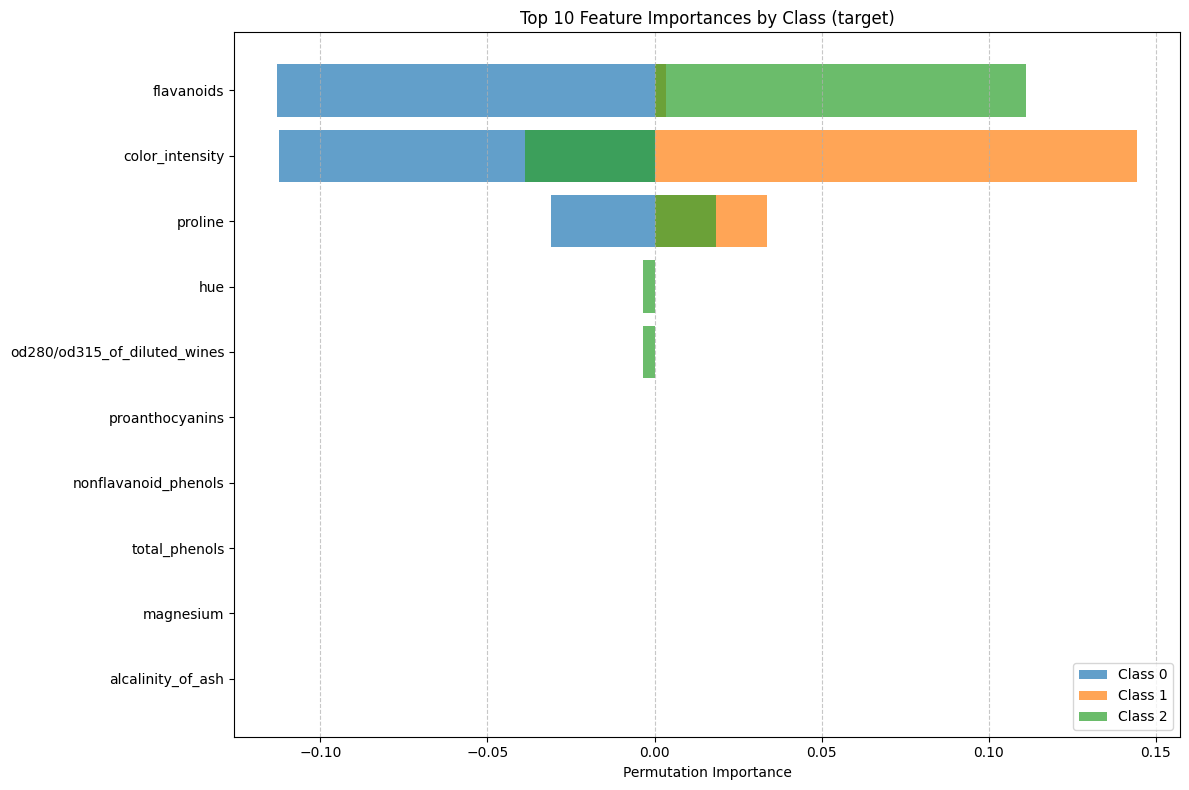

In [39]:
data = pd.read_csv("data/wine.csv")

# Run the model pipeline
overfit_metric, model = random_forest(
    data,
    tar="target",
    tar_skew=True,
    pred_skew=True,
    columns_to_remove=[],
    identify_predictors=True,
    graphs=True,
    dim_reduce=True,
    categorical=True  # Set True for classification problems like Wine, Breast Cancer, and Digits
)

Mappings:
Mean Overall test F1 score: 0.94
Overall F1 score: 0.99


<Figure size 800x600 with 0 Axes>

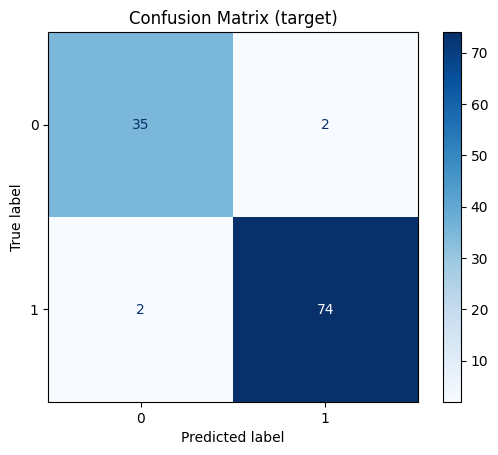

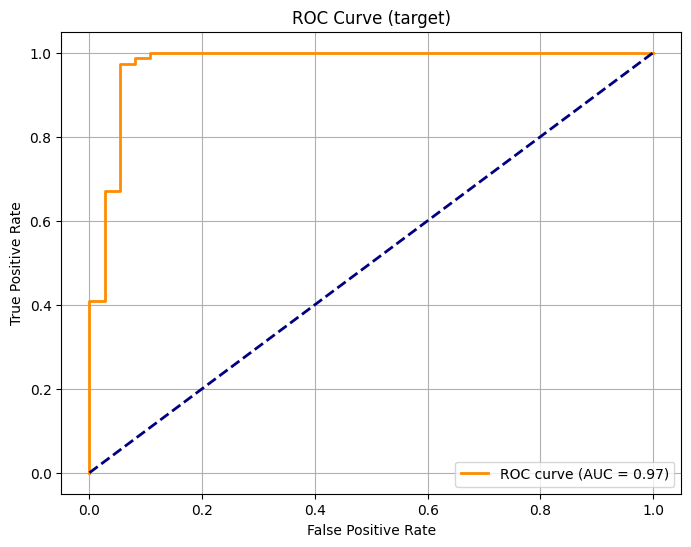

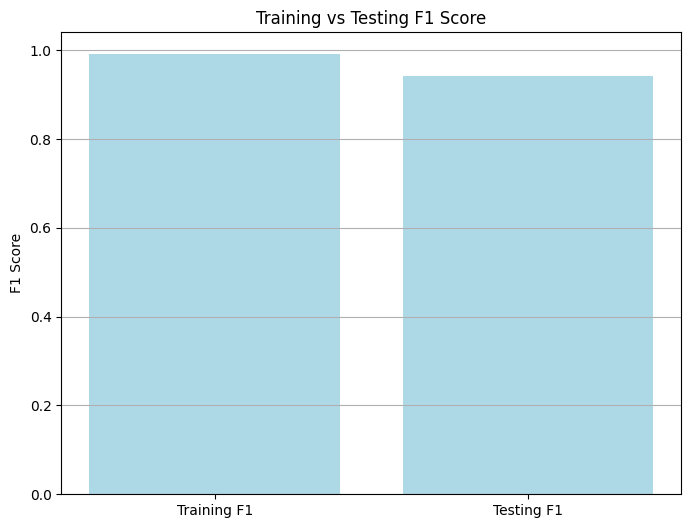

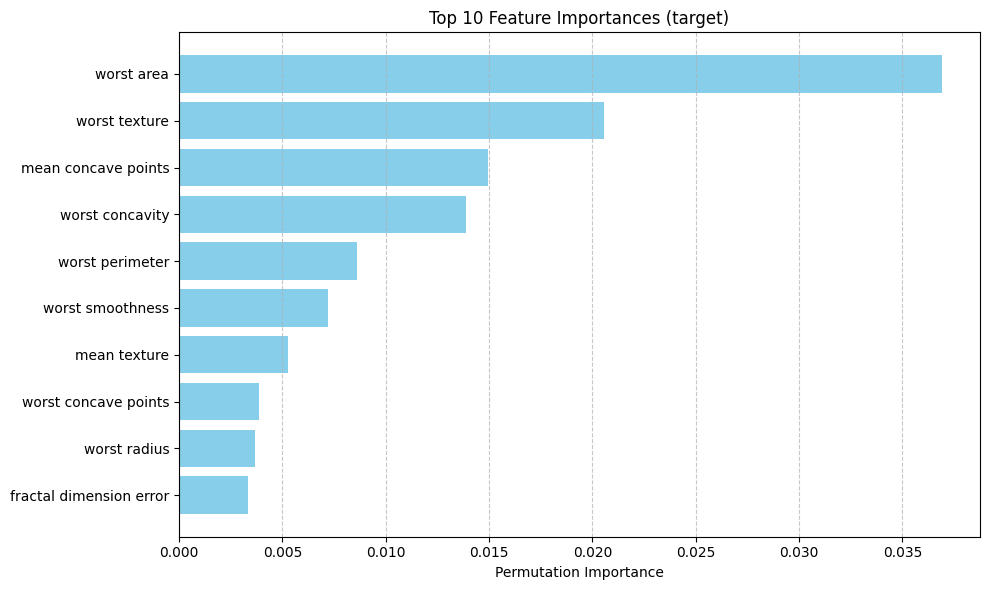

In [44]:
data = pd.read_csv("data/breast_cancer.csv")

# Run the model pipeline
overfit_metric, model = random_forest(
    data,
    tar="target",
    tar_skew=True,
    pred_skew=True,
    columns_to_remove=[],
    identify_predictors=True,
    graphs=True,
    dim_reduce=True,
    categorical=True  
)

Mappings:
Mean Overall test MSE: 0.26
Mean Overall test MAE: 0.35
Mean Overall test R²: 0.81
Overall MSE: 0.24
Overall MAE: 0.33
Overall R²: 0.82

Correlation metrics on test set:
R² (Pearson squared): 0.8063
Spearman coefficient: 0.9008
P-value (Spearman): 0.0000


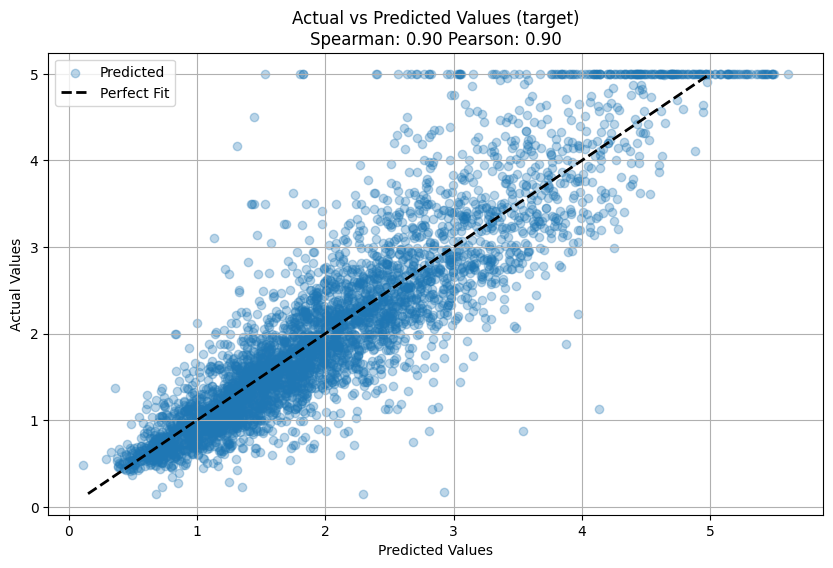

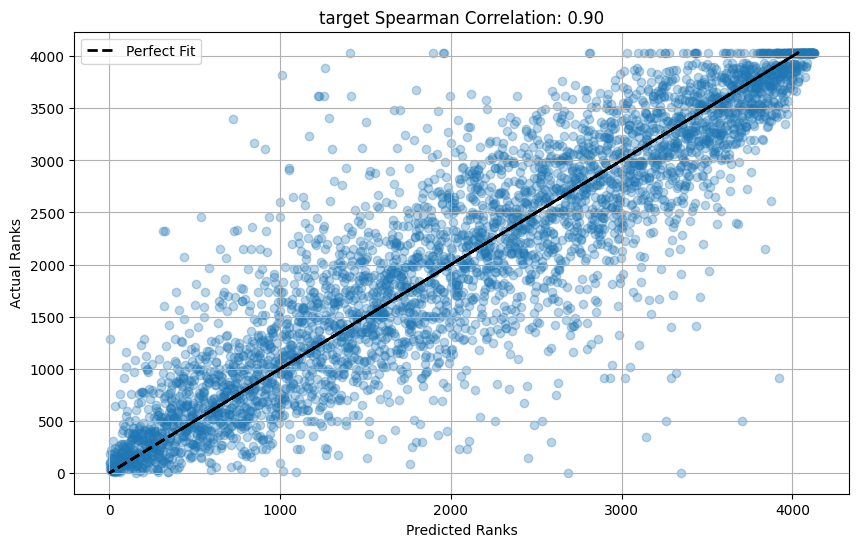

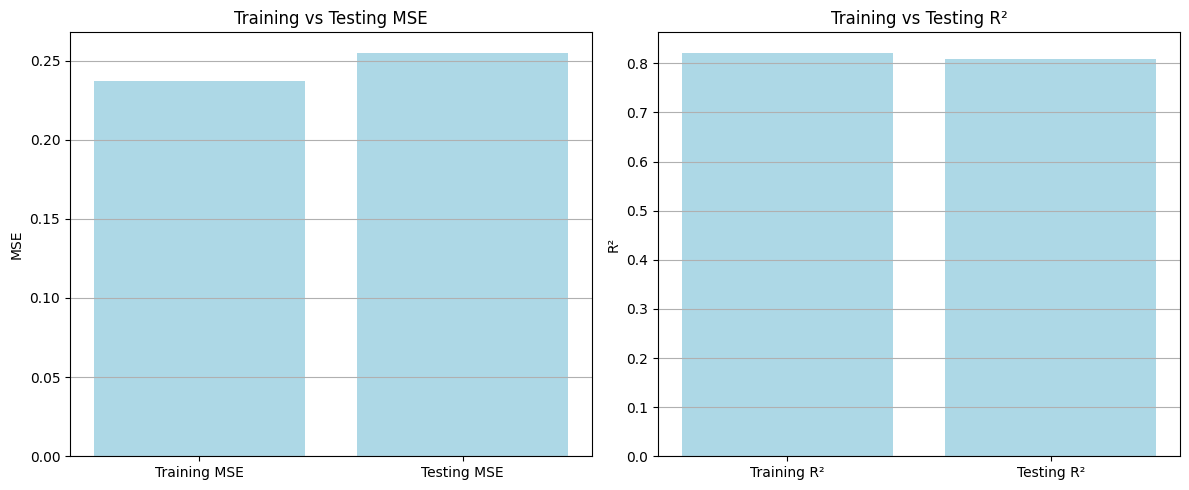

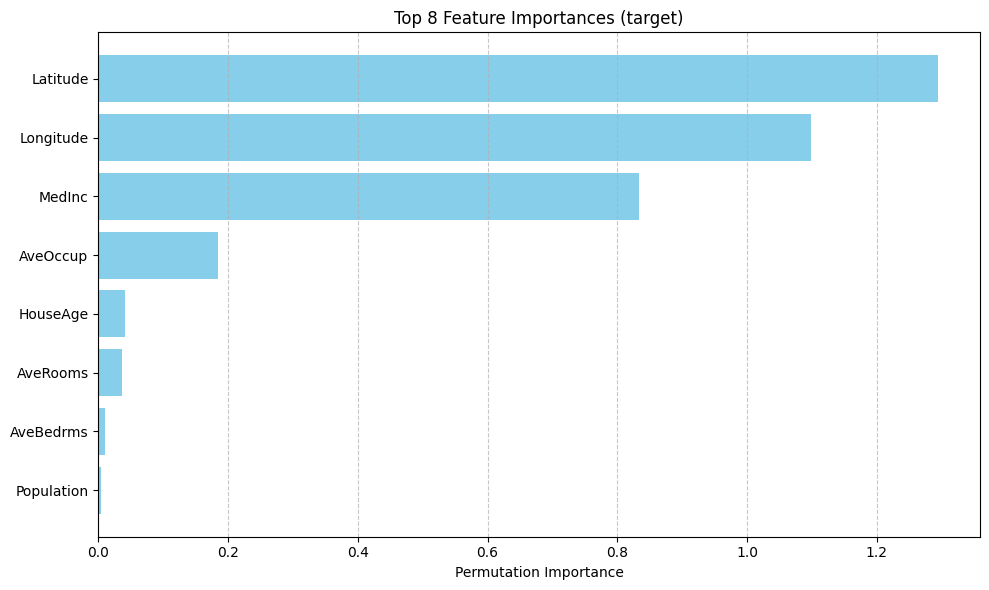

In [45]:
data = pd.read_csv("data/california_housing.csv")

# Run the model pipeline
overfit_metric, model = random_forest(
    data,
    tar="target",
    tar_skew=True,
    pred_skew=True,
    columns_to_remove=[],
    identify_predictors=True,
    graphs=True,
    dim_reduce=True,
    categorical=False  
)

Mappings:
Mean Overall test F1 score: 0.94
Overall F1 score: 0.98


<Figure size 800x600 with 0 Axes>

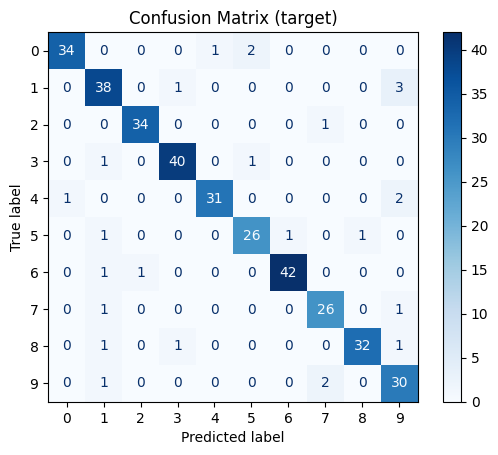

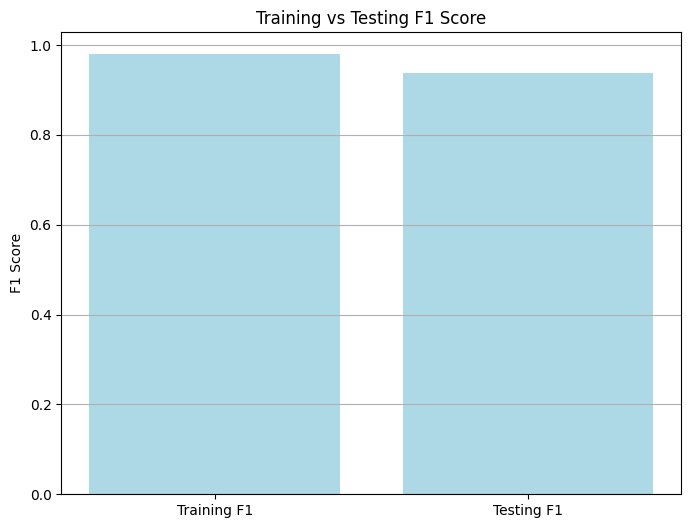

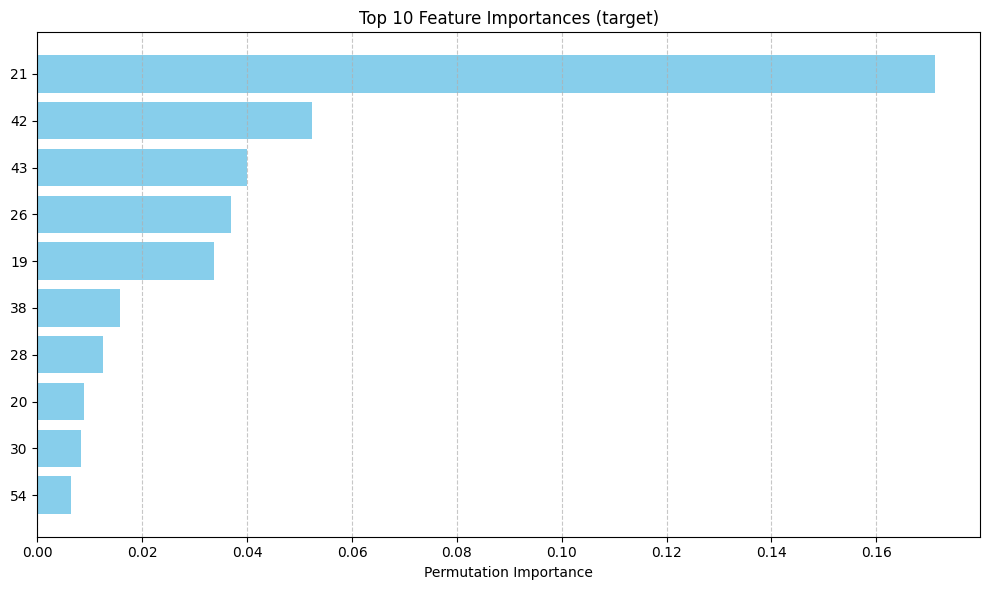

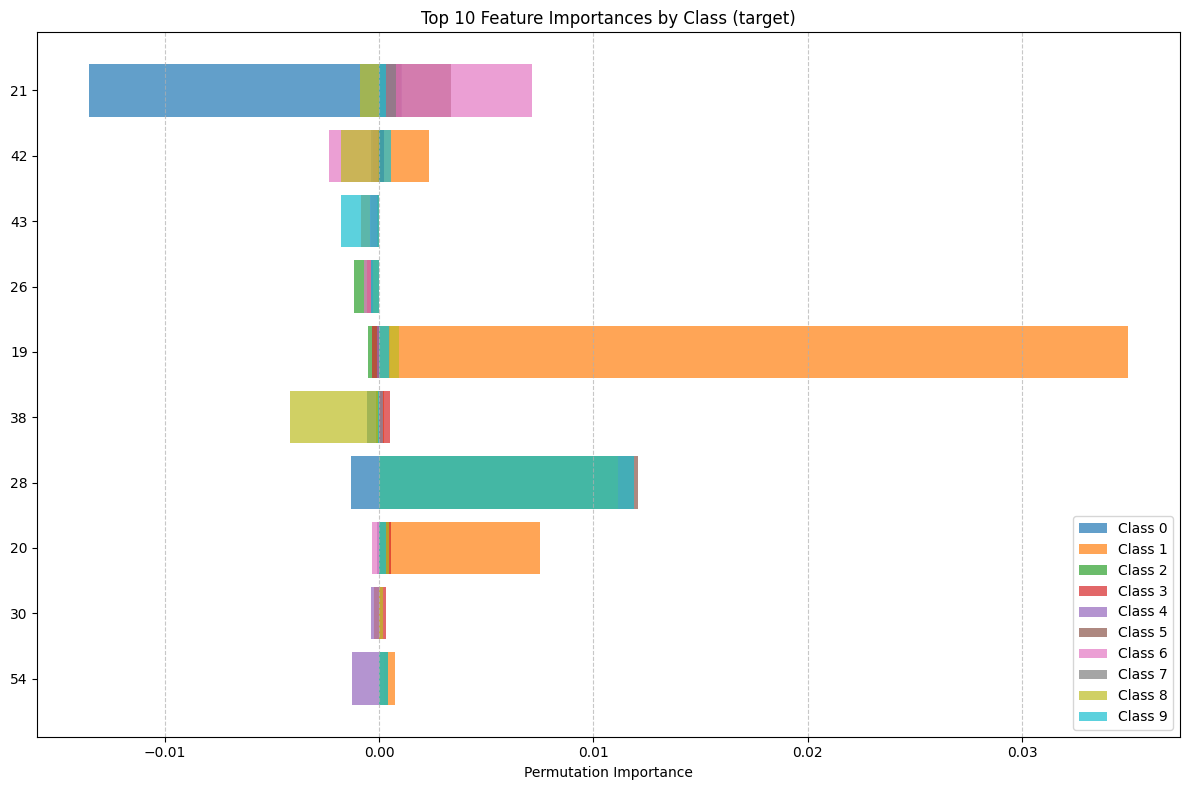

In [46]:
data = pd.read_csv("data/digits.csv")

# Run the model pipeline
overfit_metric, model = random_forest(
    data,
    tar="target",
    tar_skew=True,
    pred_skew=True,
    columns_to_remove=[],
    identify_predictors=True,
    graphs=True,
    dim_reduce=True,
    categorical=True  
)